# Activation Functions - dimensions

In [1]:
import torch.nn

m = torch.nn.Softmax(dim=1)
img = torch.randn(1, 2, 3)
model_output = m(img)

print(img)
print(model_output)

tensor([[[ 0.1900,  0.8290, -0.3285],
         [ 0.8916, -0.5556, -0.8311]]])
tensor([[[0.3315, 0.7997, 0.6231],
         [0.6685, 0.2003, 0.3769]]])


# MSE

In [187]:
criterion = torch.nn.MSELoss()

# x and y coordinate of center of max area element pred and center of oval around max area element pred

good = criterion(torch.tensor([0.5, 0.1]), torch.tensor([0.3, 0.1]))
mid = criterion(torch.tensor([0.5, 0.1]), torch.tensor([0.10, 0.1]))
bad = criterion(torch.tensor([0.8, 0.9]), torch.tensor([0.3, 0.1]))

print(good, mid, bad)

tensor(0.0200) tensor(0.0800) tensor(0.4450)


# Rampup function visualisation

0.010132432219606831


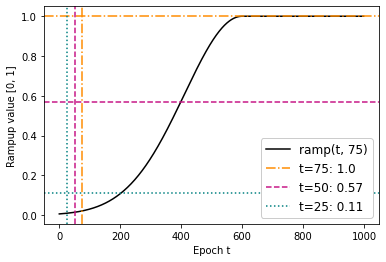

In [2]:
import numpy as np
import matplotlib.pyplot as plt

currents = range(0, 1000)
rampup_length = 600

results = []
for current in currents:
    current = np.clip(current, 0.0, rampup_length)
    result = float(np.exp(-5.0 * (1.0 - current / rampup_length) ** 2))
    results.append(result)

print(results[25])
    
plt.figure()
plt.plot(currents, results, color = 'k', label = "ramp(t, 75)")
plt.xlabel("Epoch t")
plt.ylabel("Rampup value [0, 1]")
plt.axvline(x = 75, color = 'darkorange', label = 't=75: 1.0', linestyle = '-.')
plt.axhline(y = 1, color = 'darkorange', linestyle = '-.')
plt.axvline(x = 50, color = 'mediumvioletred', label = 't=50: 0.57', linestyle = '--')
plt.axhline(y = 0.57, color = 'mediumvioletred', linestyle = '--')
plt.axvline(x = 25, color = 'teal', label = 't=25: 0.11', linestyle = ':')
plt.axhline(y = 0.11, color = 'teal', linestyle = ':')
plt.legend(loc = 'lower right', facecolor="white", framealpha=1, fontsize="large")
plt.tight_layout()
plt.savefig("example_results/rampup.png", dpi=1200)


# dict from keys

In [3]:
b_keys = [  'loss',
            'acc', 'fscore', 'fmicro', 'jac', 'prec', 'rec',
            'symhd' # task specific: segmentation
        ]

# everything we want to track
batch_collector = { key : [] for key in b_keys }

print(batch_collector)

for i in range(5):
    batch_collector["loss"].append(4)
    # batch_collector["acc"] = 1.0

print(batch_collector)

{'loss': [], 'acc': [], 'fscore': [], 'fmicro': [], 'jac': [], 'prec': [], 'rec': [], 'symhd': []}
{'loss': [4, 4, 4, 4, 4], 'acc': [], 'fscore': [], 'fmicro': [], 'jac': [], 'prec': [], 'rec': [], 'symhd': []}


In [4]:
Details = {"Destination": "China", 
           "Nationality": "Italian", "Age": []}

for i in range(5):
    Details["Age"].append(2) # [20, "Twenty"]
    
print(Details)

{'Destination': 'China', 'Nationality': 'Italian', 'Age': [2, 2, 2, 2, 2]}


In [5]:
for key in batch_collector.keys():
    print(key, np.mean(batch_collector[key]))
    

loss 4.0
acc nan
fscore nan
fmicro nan
jac nan
prec nan
rec nan
symhd nan


C:\Users\Prinzessin\anaconda3\envs\feta\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Prinzessin\anaconda3\envs\feta\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
# set of vowels
keys = {'a', 'e', 'i', 'o', 'u' }

# assign empty list to value
value = []

# creates a dictionary with keys and values
vowels = { key : [] for key in keys }

vowels["a"].append("hi")

print(vowels)

{'u': [], 'a': ['hi'], 'o': [], 'i': [], 'e': []}


# Grid Search

In [7]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# doing contour stuff here - to draw an area, it needs to be in a list

In [ ]:
import numpy as np
import cv2
img = cv2.imread('E:/Christina/Result_Data/ADAM_AMD/fundus_mask_bin/A0010.bmp', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

area = cv2.contourArea(cnt)
print(area)

num_labels, labels_im = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)    
if len(num_labels) > 0:
    max_area = max(num_labels, key = cv2.contourArea)
    max_area = cv2.contourArea(max_area)
    print(max_area)